# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [5]:
#function
data = df_raw.copy()
data.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range for GRE scores is much larger than the range for GPA scores.

#### Question 4. Drop data points with missing data


In [6]:
# .dropna() = also works to drop all missing data
data = data[data.gre.notnull()].copy()
data = data[data.gpa.notnull()].copy()
data = data[data.prestige.notnull()].copy()
data.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: There are fewer rows and there are no NaN values in my chart above. 

#### Question 6. Create box plots for GRE and GPA

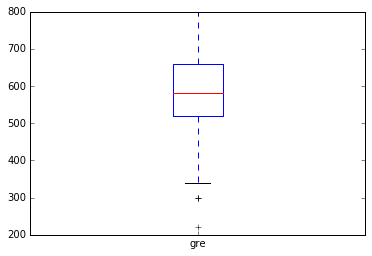

In [7]:
#boxplot 1
data['gre'].plot(kind='box')

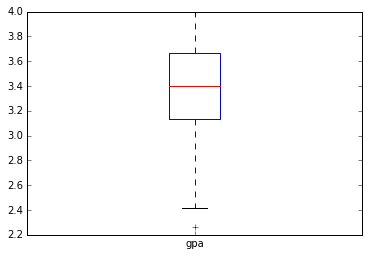

In [8]:
#boxplot 2 
data['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The minimum value, maximum value, quartiles, outliers, and the median of that dataset.

#### Question 8. Describe each distribution 

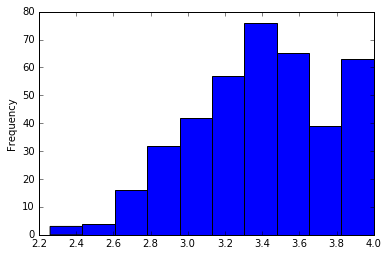

In [9]:
# plot the distribution of each variable 
data['gpa'].plot(kind='hist')

In [10]:
data['gpa'].skew()

-0.21688893296924305

In [11]:
data['gpa'].kurt()

-0.56356989952216807

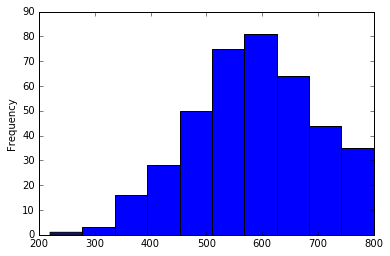

In [12]:
data['gre'].plot(kind='hist')

In [13]:
data['gre'].skew()

-0.146046988215597

In [14]:
data['gre'].kurt()

-0.33286435465143427

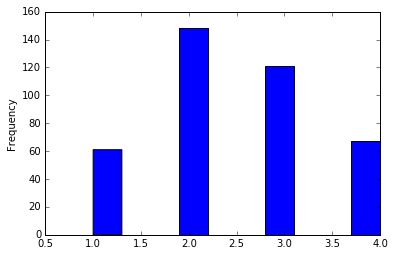

In [18]:
data['prestige'].plot(kind='hist')

In [19]:
data['prestige'].skew()

0.086505552897055041

In [21]:
data['prestige'].kurt()

-0.90103795489017591

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: I would say yes, but they are slightly skewed. GRE would be the closest to normal though.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, the values are skewed. 

#### Question 11. Which of our variables are potentially colinear? 

In [17]:
# create a correlation matrix for the data
data.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are potentially colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would do get_dummies for prestige and run a linear regression model.

#### Question 14. What is your hypothesis? 

Answer: If we're only comparing admissions rate and prestige, I would say the higher the prestige, the lower the admission rate. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data